<a href="https://colab.research.google.com/github/HafizAQ/ML_Practices/blob/main/DecisionTree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Courtesy:** https://www.youtube.com/watch?v=yi7KsXtaOCo

**Decision Tree (DT):** Supervised learning algorithm which is essentially **a series of questions designed to assign a class/value**
- Classification Tree (DT)
- Regression Tree (DT)

Root (top most decision node) + Leaf Nodes (where classes are assigned) + Internal node (sequence of decisions)

**When to Use DT:**
- Sequence of questions to assign a class

**The Selection Criterion**
- Two Criterion: **GINI & Entropy**
- DTs split on features corresponding split point that results **the largest information gain (IG)**
- IG = Information before splitting (parent) - Information after (children)
- The strategy used to prune the tree usually has a greater impact on the final tree than the choice of impurity measure.

**Regression Tree**
- Decision trees used for reqgression are called regression trees  
- Instead of returning a class, its **decision node return a single numeric value** for each set of conditions

**Pros of DT:**
- Highly Interpretable
- Prediction is fast
- Used for classification and regression
- Don't require feature scaling

**Cons/ Limitations of DT:**
- Without pruning/ cross-validation, they are prone to overfitting
- Small variations in data result in a completely different tree
- They don't work well with highly unbalanced classes


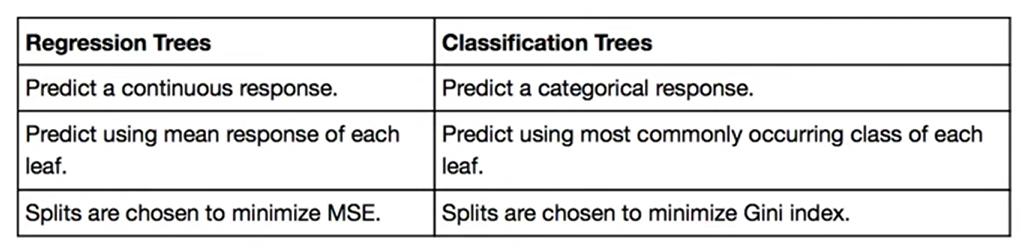

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np #metrix multiplication
import pandas as pd #reading excel

#Dataset import
from sklearn.datasets import load_iris

#Decision Tree based imports
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For train test split and cross validation
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [3]:
data = load_iris()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
from sklearn.tree import DecisionTreeClassifier

#Create X and y variable to store the X (feature matrix) and y (target) from iris dataset

X= df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values
X.shape

(150, 4)

In [9]:
y= df['target'].values
y=y.reshape(-1,1)
y.shape

(150, 1)

In [10]:
#Make the model on the data
clf = DecisionTreeClassifier(max_depth=5, random_state=0)
clf.fit(X, y) #train the model on the data

#Class Predictions
Predictions=clf.predict(X)
Predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
#Measure the performance of the model

score=clf.score(X,y)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 1.0


In [12]:
#Overfitted, splitting train and test
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [14]:
#Original Feature Matrix
X.shape

(150, 4)

In [15]:
#Original target Vector (not metrix)

y.shape


(150, 1)

In [16]:
X_train.shape

(120, 4)

In [17]:
X_test.shape

(30, 4)

In [18]:
y_train.shape

(120, 1)

In [19]:
y_test.shape

(30, 1)

In [20]:
#Build Model and Make Predictions

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

clf.fit(X_train, y_train)
predictions=clf.predict(X_test)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0])

In [22]:
#Measuring Performance of the Model/ Calculate the accuracy of the model

score=clf.score(X_test, y_test)
print('Accuracy Score: {0}'.format(score))


#Advantage of Test and Train Split: Fast, simple, computationally inexpensive
#Disadvantage: Eliminates data

Accuracy Score: 0.9666666666666667


In [25]:
#K-Folds Cross Validation
kf = KFold(n_splits=5, shuffle=False)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [29]:
accuracy_list = []
n=0
print('-----------------Cross-Validation Each Fold--------------')
for train_index, test_index in kf.split(X, y): #split the feature metrix and target vector in every fold
    clf=DecisionTreeClassifier().fit(X[train_index], y[train_index])
    score = clf.score(X[test_index], y[test_index])

    accuracy_list.append(score)
    print('Model', n+1)
    print('Accuracy: ', accuracy_list[n])
    n=n+1

print('Mean of Accuracy for all folds: ', np.mean(accuracy_list))



#Advantage of K-fold Cross-validation: More accurate, out-of-sample accuracy + More "efficient" use of data (every observation is used for both training and testing)
#Advantages of train/test split: Run K time faster than K-Fold Validation, Simpler to examine the detailed results of the testing process

-----------------Cross-Validation Each Fold--------------
Model 1
Accuracy:  1.0
Model 2
Accuracy:  1.0
Model 3
Accuracy:  0.9
Model 4
Accuracy:  0.9333333333333333
Model 5
Accuracy:  0.8333333333333334
Mean of Accuracy for all folds:  0.9333333333333332


#Decision Tree Implemenataion with titanic dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from IPython.display import Image

In [33]:
#Figure out what to import the csv file: titanic dataset

df=pd.read_csv('titanic.csv', index_col='PassengerId')
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
#Data to feature metrix and target vector

feature_cols = ['Pclass','Parch', 'Age', 'Sex']

In [35]:
#Transform Sex Column Values: male 0, female 1
df['Sex'] = df.Sex.map({'male':0, 'female':1})

In [38]:
#Remove or Impute the missing values for the Age column
# df.loc[df.Age.isnull(), 'Age']=np.floor(df.Age.mean())

#Remove rows where age is nana from the dataset

df = df.loc[~df.Age.isnull(),:]

In [40]:
#Create X(important feature metrix) and y(target vector)
X = df.loc[:, feature_cols]
# y = df.Survived.values
y = df['Survived']

####Benifit of Decision Tree: No need to standardize your data unlike PCA and logistic regression (extra preprocessing step)

In [41]:
#Spliting date into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  #No spliting ratio

In [42]:
#Fit a Classification Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [43]:
#Return a numpy array
#Predict for One Observation (image)

clf.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [44]:
#Class prediction (not predicted probabilities)
predictions=clf.predict(X_test)

In [46]:
#Calculate Classification Accuracy
score=clf.score(X_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 0.7937219730941704


In [47]:
#Compare your Testing accuracy with null accuracy
y_test.value_counts()

,count
Survived,
0,139
1,84


In [49]:
103/(103+86)

0.544973544973545

In [50]:
#This particular model has 79.4% accuracy, copared to null accuracy as 54.5%

In [51]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[119,  20],
       [ 26,  58]])

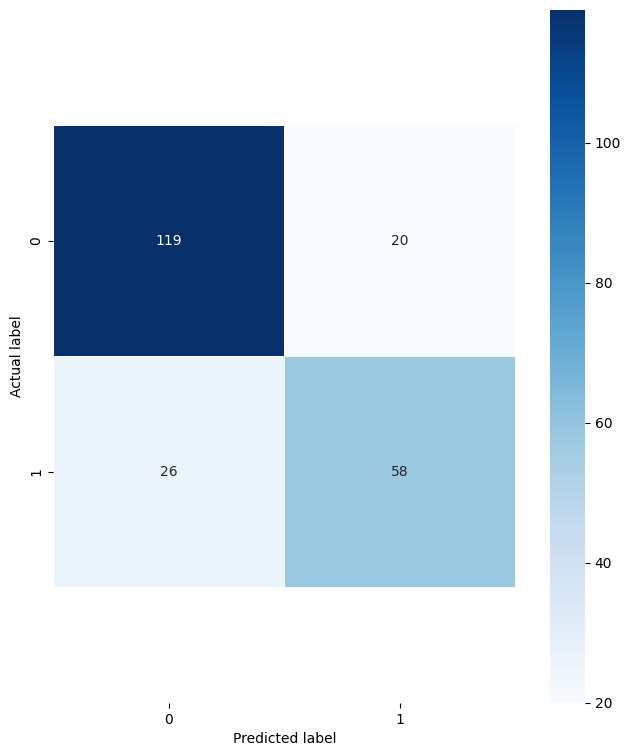

In [55]:
#Confusion matrix for Titanic Predictions

plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

b, t = plt.ylim() #discover the values for bottom and top
plt.ylim(b+0.5, t-0.5)#Add 0.5 to bottom, and Subtract 0.5 from the top
plt.show()

In [56]:
#Feature Importance (total amount of Gini index or Entropy decrease due to split over a given feature)
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.668
Pclass,0.227
Age,0.104
Parch,0.000


[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.474\nsamples = 668\nvalue = [410, 258]\nclass = Dead'),
 Text(0.25, 0.625, 'Age <= 14.0\ngini = 0.311\nsamples = 437\nvalue = [353, 84]\nclass = Dead'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Pclass <= 2.5\ngini = 0.491\nsamples = 30\nvalue = [13, 17]\nclass = Survived'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = Survived'),
 Text(0.1875, 0.125, 'gini = 0.432\nsamples = 19\nvalue = [13, 6]\nclass = Dead'),
 Text(0.375, 0.375, 'Pclass <= 1.5\ngini = 0.275\nsamples = 407\nvalue = [340, 67]\nclass = Dead'),
 Text(0.3125, 0.125, 'gini = 0.439\nsamples = 89\nvalue = [60, 29]\nclass = Dead'),
 Text(0.4375, 0.125, 'gini = 0.21\nsamples = 318\nvalue = [280, 38]\nclass = Dead'),
 Text(0.75, 0.625, 'Pclass <= 2.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]\nclass = Survived'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Age <= 2.5\ngini = 0.116\nsamples = 129\nvalue = [8, 121]\nclass = Survived'),
 Tex

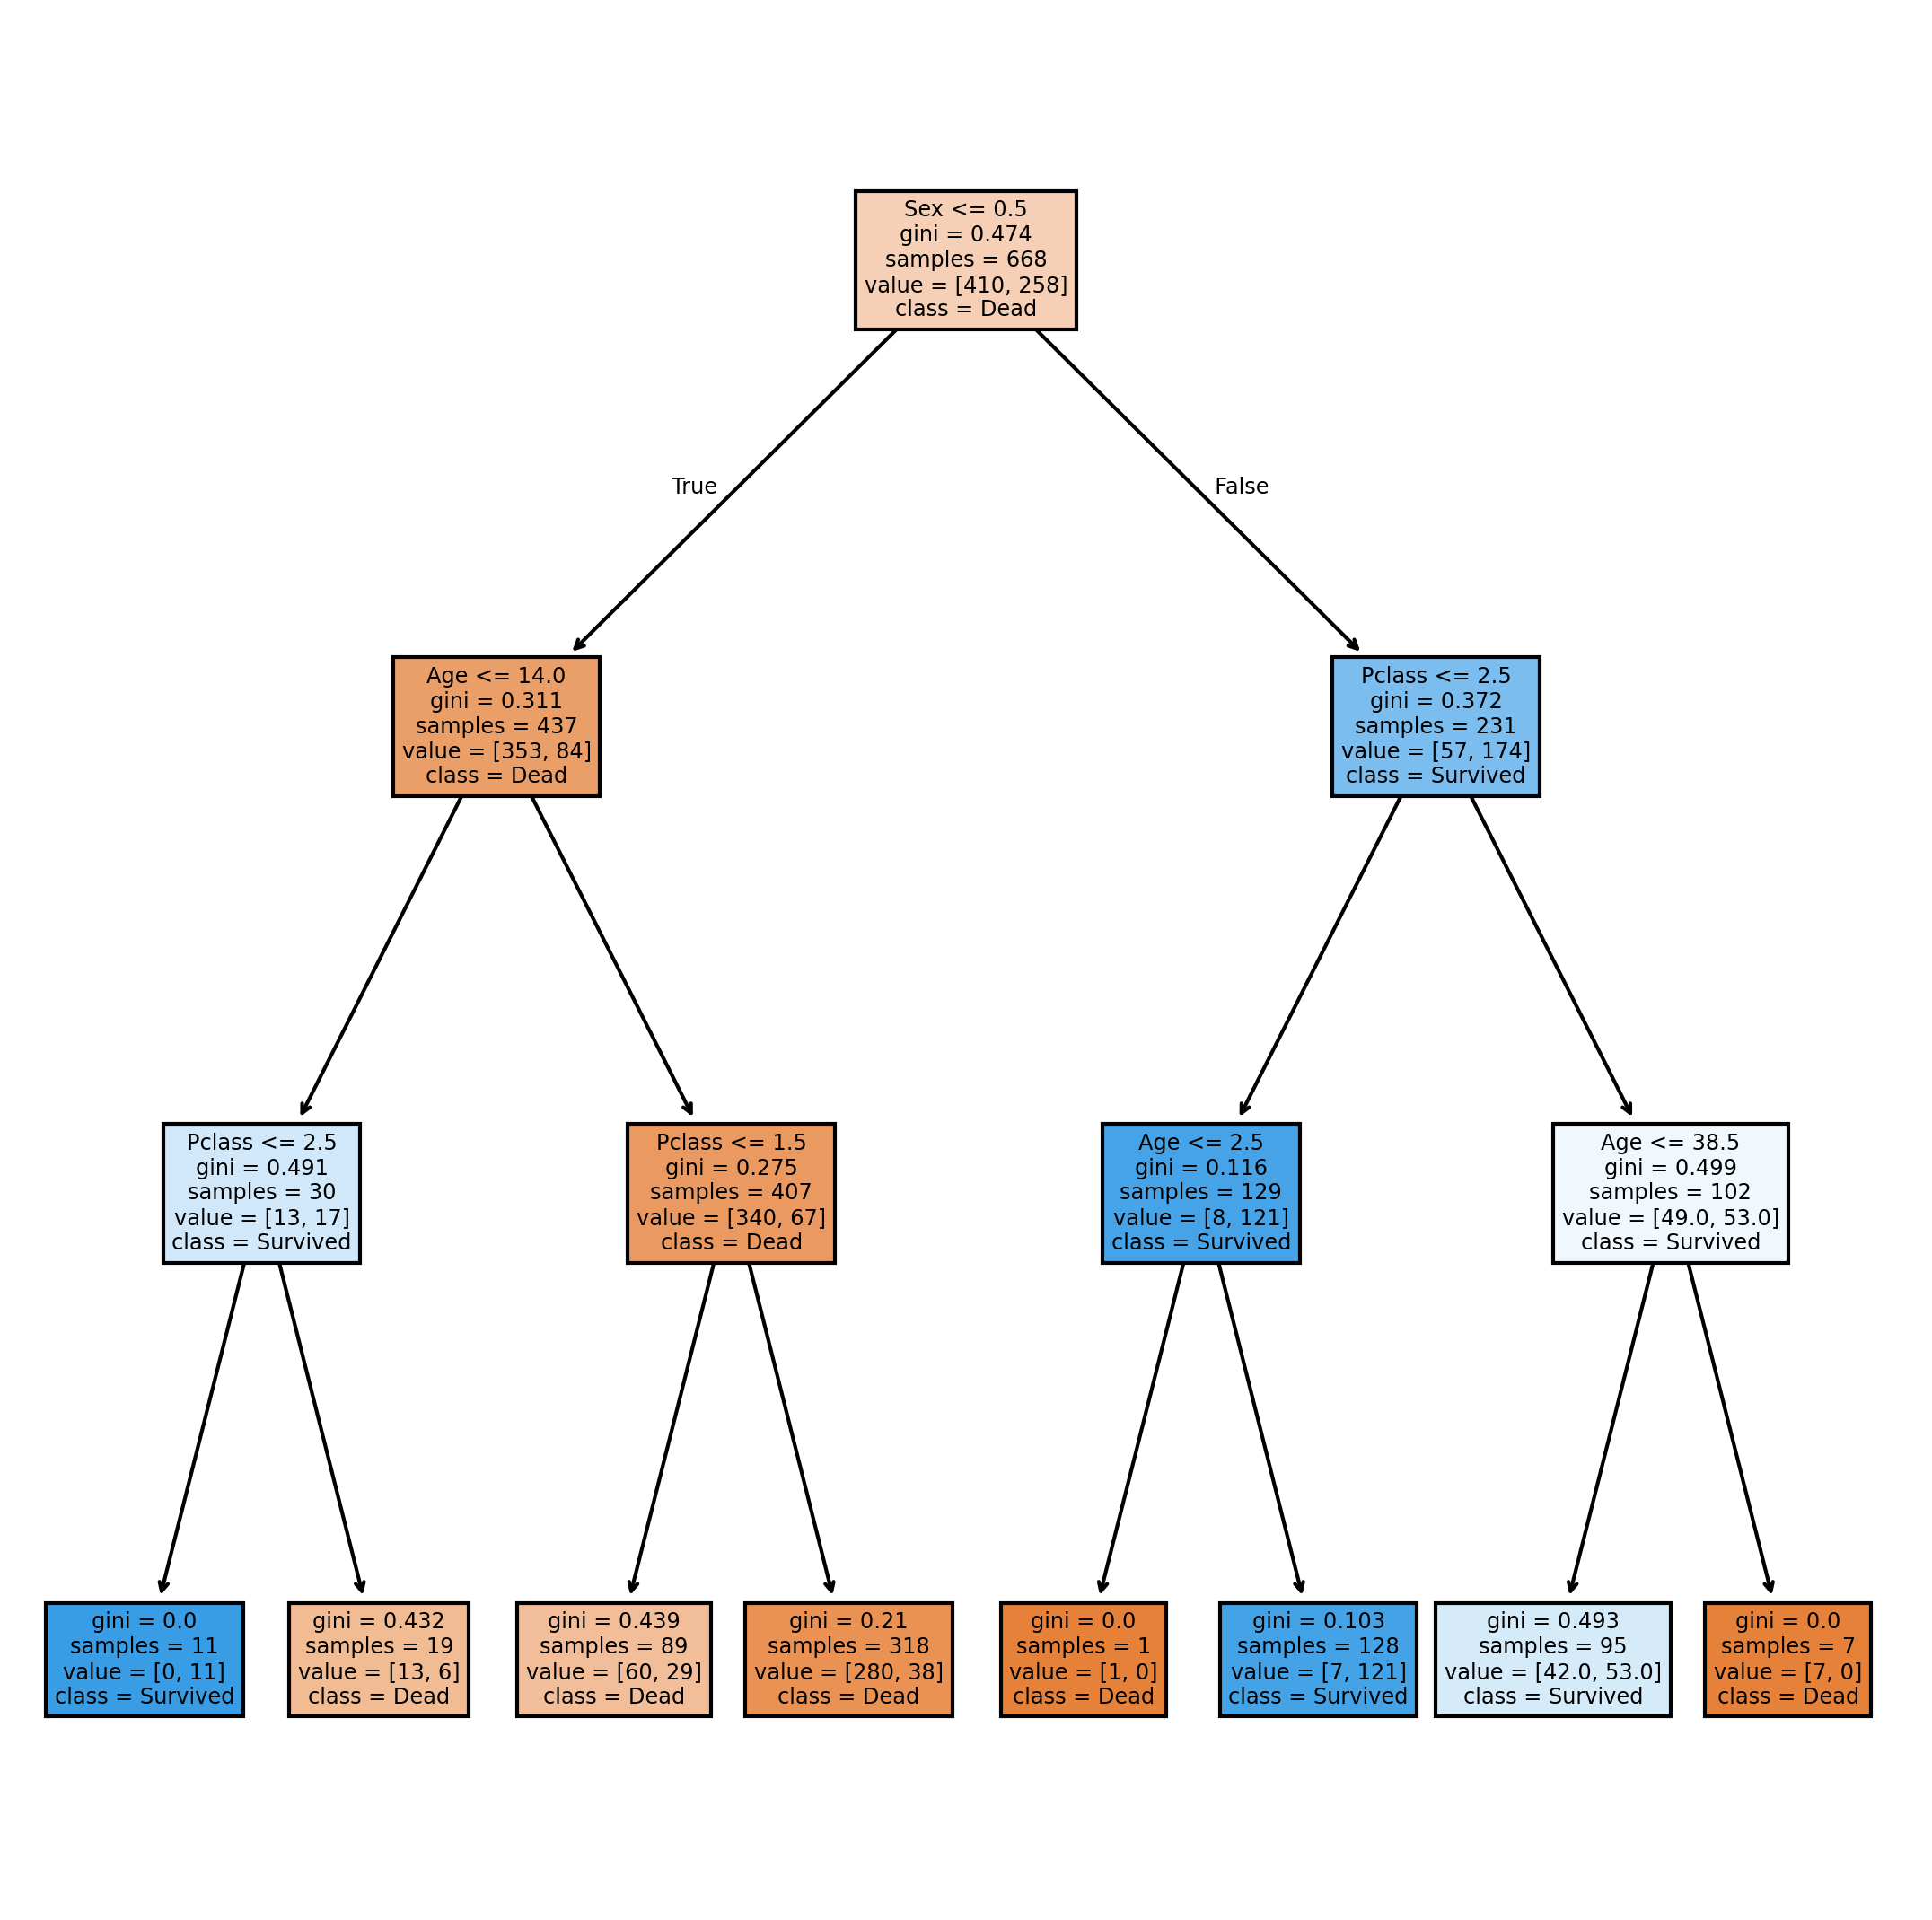

In [58]:
#Creating Decision Tree Visualization
plt.figure(figsize=(9,9), dpi=300)
tree.plot_tree(clf, feature_names=feature_cols, class_names= ['Dead','Survived'], filled=True)